In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

from sklearn.svm import SVC
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import scipy.io


## Load and visualize data

In [2]:
mat = scipy.io.loadmat('linear_svm.mat')
X_train = mat["X_train"]
X_test = mat["X_test"]
y_train = mat["labels_train"]
y_test = mat["labels_test"]

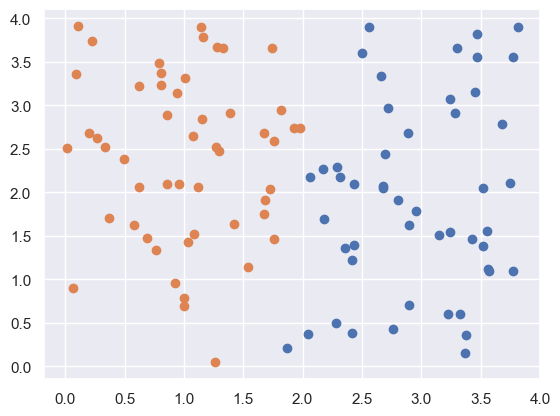

In [3]:
plt.scatter(X_train[y_train.reshape(-1,)==1,0], X_train[y_train.reshape(-1,)==1,1])
plt.scatter(X_train[y_train.reshape(-1,)==-1,0], X_train[y_train.reshape(-1,)==-1,1])

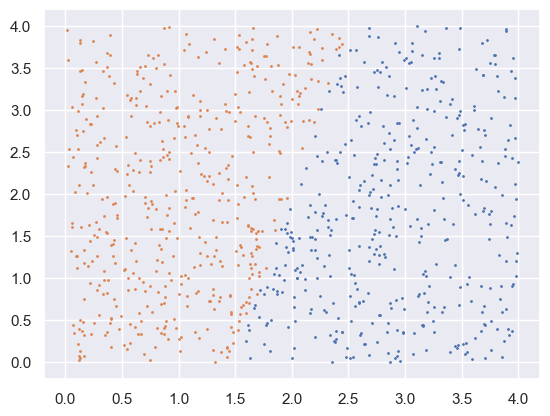

In [8]:
plt.scatter(X_test[y_test.reshape(-1,)==1,0], X_test[y_test.reshape(-1,)==1,1], s=1)
plt.scatter(X_test[y_test.reshape(-1,)==-1,0], X_test[y_test.reshape(-1,)==-1,1], s=1)

## Define SVM problem and solve it with CVXOPT
Soft-margin formulation of the problem

In [6]:
N,M = X_train.shape

In [21]:
C = 10
P = np.zeros([N+1+M, N+1+M])
for i in range(M):
    P[i,i] = 1

q = np.zeros([N+1+M,])
for i in range(1,N+1):
    q[-i] = C

G = np.zeros([2 * N, N + 1 + M])
for i in range(N):
    G[i, :M] = y_train[i] * X_train[i]
    G[i, M] = y_train[i]
    G[i, M + 1 + i] = 1
for i in range(N):
    G[N + i, M + 1 + i] = 1
G = - G 

h = np.concatenate((- np.ones([N,]), np.zeros([N,])))

In [22]:
P = cvxopt_matrix(P)
q = cvxopt_matrix(q)
G = cvxopt_matrix(G)
h = cvxopt_matrix(h)

sol = cvxopt_solvers.qp(P, q, G, h)
x = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -8.6506e+03  4.3378e+03  1e+04  2e+01  4e+00
 1: -1.8725e+02 -4.8101e+02  2e+03  2e+00  4e-01
 2:  2.8911e+01 -7.3496e+01  3e+02  2e-01  5e-02
 3:  3.6287e+01 -4.8462e-01  7e+01  5e-02  1e-02
 4:  3.5175e+01  1.6042e+01  3e+01  2e-02  4e-03
 5:  3.5042e+01  2.3646e+01  2e+01  6e-03  1e-03
 6:  3.2541e+01  2.8417e+01  4e+00  8e-05  2e-05
 7:  3.0819e+01  3.0496e+01  3e-01  4e-06  9e-07
 8:  3.0672e+01  3.0667e+01  6e-03  6e-08  1e-08
 9:  3.0670e+01  3.0670e+01  4e-04  2e-09  4e-10
10:  3.0670e+01  3.0670e+01  4e-06  2e-11  5e-12
Optimal solution found.


In [23]:
# Extract parameters w and b
w = x[:M]
b = x[M]

## Evaluate model
On test set

In [24]:
print("************ Accuracy *****************")
(np.sign(np.matmul(X_test, w) + b[0]) == y_test).sum() / y_test.shape[0]

************ Accuracy *****************


0.9788888888888889

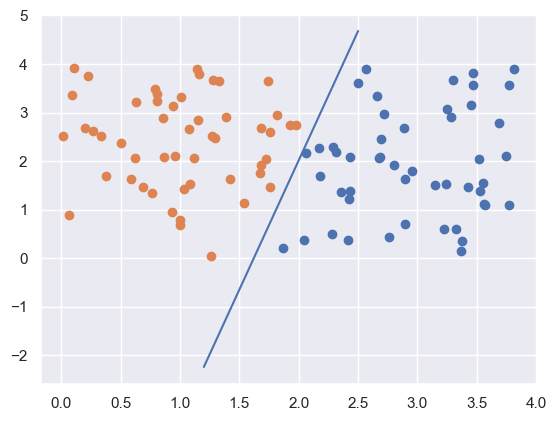

In [25]:
# Plot separation surface
plt.scatter(X_train[y_train.reshape(-1,)==1,0], X_train[y_train.reshape(-1,)==1,1])
plt.scatter(X_train[y_train.reshape(-1,)==-1,0], X_train[y_train.reshape(-1,)==-1,1])
plt.plot(np.linspace(1.2,2.5), np.linspace(1.2,2.5) * (-w[0]/w[1]) - b[0]/w[1])